In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer

In [2]:
def gaussian(x, mu=0, sig=1):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

In [20]:
def fit_bspline(f, degree=3, n_knots=10, n_samples=40, xmin=-2, xmax=2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x_range = np.linspace(xmin, xmax, n_samples).reshape(n_samples, 1)
    y_true = f(x_range)
    spline = make_pipeline(
        SplineTransformer(degree=degree, n_knots=n_knots), Ridge(alpha=1e-3)
    )
    model = spline.fit(x_range, y_true)
    y_model = model.predict(x_range)
    ax.plot(x_range, y_true, "kx")
    ax.plot(x_range, y_true)
    (line,) = ax.plot(x_range, y_model, "--")

    def update_model(degree=3, n_knots=10):
        spline = make_pipeline(
            SplineTransformer(degree=degree, n_knots=n_knots), Ridge(alpha=1e-3)
        )
        model = spline.fit(x_range, y_true)
        variance = np.power((model.predict(x_range) - y_true), [2] * n_samples)
        print(f"RMS error: {np.sqrt(variance.sum()):.4f}")
        line.set_ydata(model.predict(x_range))
        fig.canvas.draw_idle

    return update_model

interactive(children=(IntSlider(value=3, description='degree', max=5, min=1), IntSlider(value=10, description=…

<function __main__.fit_bspline.<locals>.update_model(degree=3, n_knots=10)>

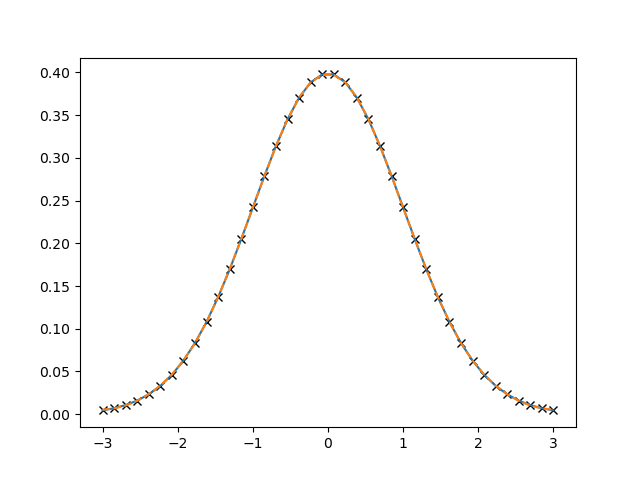

In [21]:
%matplotlib notebook
updater = fit_bspline(gaussian, xmin=-3, xmax=3)
interact(updater, degree=(1, 5, 1), n_knots=(2, 10, 1))

interactive(children=(IntSlider(value=3, description='degree', max=5, min=1), IntSlider(value=10, description=…

<function __main__.fit_bspline.<locals>.update_model(degree=3, n_knots=10)>

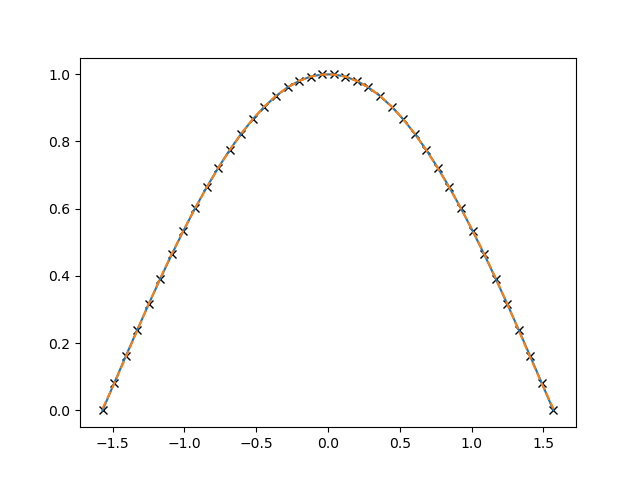

In [22]:
%matplotlib notebook
updater = fit_bspline(np.cos, xmin=-np.pi / 2, xmax=np.pi / 2)
interact(updater, degree=(1, 5, 1), n_knots=(2, 10, 1))

interactive(children=(IntSlider(value=3, description='degree', max=5, min=1), IntSlider(value=10, description=…

<function __main__.fit_bspline.<locals>.update_model(degree=3, n_knots=10)>

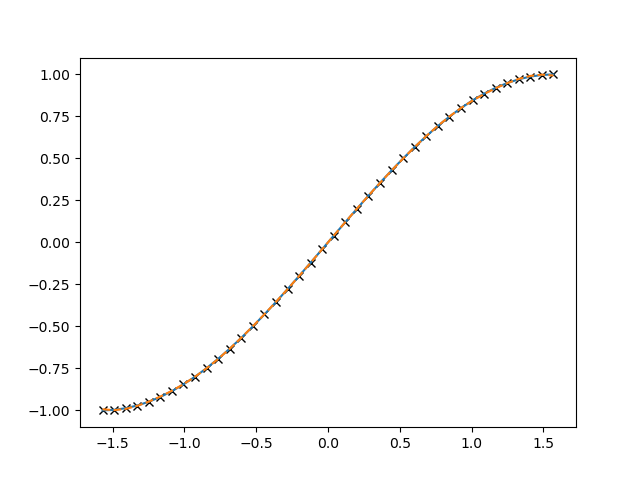

In [12]:
%matplotlib notebook
updater = fit_bspline(np.sin, xmin=-np.pi / 2, xmax=np.pi / 2)
interact(updater, degree=(1, 5, 1), n_knots=(2, 10, 1))

interactive(children=(IntSlider(value=3, description='degree', max=5, min=1), IntSlider(value=10, description=…

<function __main__.fit_bspline.<locals>.update_model(degree=3, n_knots=10)>

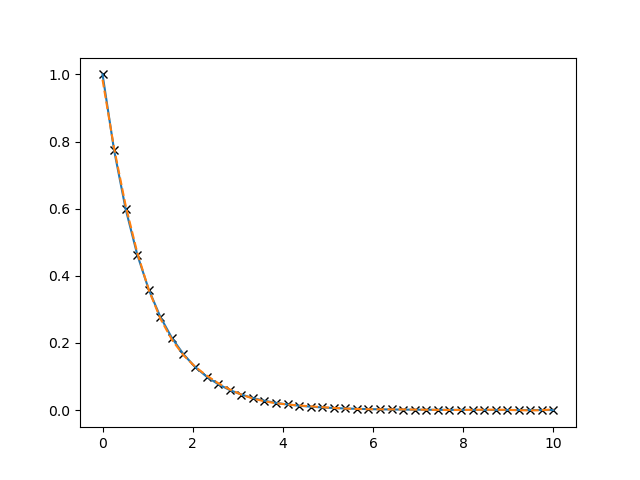

In [25]:
%matplotlib notebook
updater = fit_bspline(lambda x: np.exp(-x), xmin=0, xmax=10)
interact(updater, degree=(1, 5, 1), n_knots=(2, 10, 1))